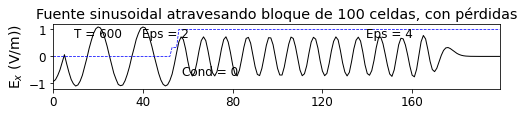

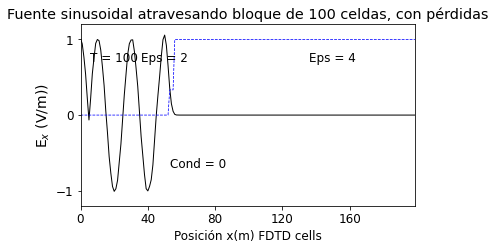

In [336]:
'''
Electromagnetismo PARCIAL II - Segundo punto
Autor: Maria Camila Hernández Ortiz 
25/10/2020

Temática: Simulación de un arreglo con bloque dieléctrico, usando el método 
FDTD (Diferencias Finitas) en 1D.

Ingeniería Física
Universidad EAFIT

'''

# Se importan las librerías necesarias
import numpy as np
from matplotlib import pyplot as plt


# Definición de variables
Te = 200# Número de interacciones en el tiempo (pasos en el tiempo)
Ex = np.zeros(Te) # Vectores que contiene el campo eléctrico 
Hy = np.zeros(Te) # Vectores que contiene el campo magnético

boundary_low = [0, 0] # Matriz para la frontera izquierda
boundary_high = [0, 0] # Matriz para la frontera derecha
#ddx = 0.01 # Cell size
#dt = ddx / 6e8 # Time step size
#freq_in = 700e6
# SimulaciÓn con FDTD en 1D parámetros de entrada
Lambda = 0.3# En metros (longitud de onda)
epsir = 2
ddx1 = Lambda/10 # Esta en metros (paso en el espacio)
ddx2 = Lambda/2*(np.sqrt(epsir)) # Esta en metros (paso en el espacio)
ddx = 0.015
dt = ddx / 6e8 # Tamaño del paso en el tiempo (Tamaño de celda)"c_0 en m/s"
freq_in = 3e8/Lambda # Frecuencia de la onda
e_0 = 8.854e-12 # Permitividad eléctrica del vacío

# Condiciones del pulso de entrada
T=8e-10/dt

# Creación del bloque dieléctrico
epsir = 2 # Epsilon relativo del material 
d = Lambda/(2*np.sqrt(epsir)) # Grosor bloque dieléctrico
ld = int(d/ddx) # (uso de 7 celdas)
d2 = Lambda/(4*np.sqrt(epsir)) # Grosor 2 bloque dieléctrico
ld2 = int(d2/ddx) # (uso de 3 celdas)
cb = np.ones(Te) * 0.5
ca = np.ones(Te)
sigma = 0 # Término de pérdida especificado por la conductividad 
#sigma = 0 # Código sin pérdidas en el material dieléctrico

# Matrices con valores asignados (necesarios) para los cálculos
cb_start = 53 # Inicio del material
cb_finish=56  # Fin del material
#cb[cb_start:cb_finish] = 0.5 / epsir 
eaf = dt * sigma / (2 * e_0 * epsir) 
ca[cb_start:cb_finish] = (1 - eaf ) / (1 + eaf )
cb[cb_start:cb_finish] = 0.5 / (epsir * (1 + eaf ))

# Creación dieléctrico con er=4 y mu=1
cb_start_2 = 56
cb_finish_2 = 200
epsir_2 = 4 
cb[cb_start_2:cb_finish_2] = 0.5 / epsir_2 #Longitud de la pelicula

nsteps = 600

# Seguimiento de los puntos deseados para trazar
plotting_points = [
{'num_steps': 600
, 'data_to_plot': None, 'label': ''},
{'num_steps': 100, 'data_to_plot': None, 'label': 'Posición x(m) FDTD cells'}]
spread=12
t0=40

# Loop FDTD
for time_step in range(1, nsteps + 1):
 # Calcular el campo eléctrico
    
    for k in range(1, Te):
        Ex[k] = ca[k] * Ex[k] + cb[k] * (Hy[k - 1] - Hy[k])

    # Pulso gaussiano extremo izquierdo
    #pulse = np.exp(-((time_step-3*T)**2)/(T**2))
    #Ex[5] = pulse + Ex[5]
     
    # Poner una sinusoidal en el extremo inferior    
    pulse = np.sin(2 * np.pi * freq_in * dt * time_step)
    Ex[5] = pulse + Ex[5]
 
    # Condiciones de frontera
    Ex[0] = boundary_low.pop(0)
    boundary_low.append(Ex[1])
    Ex[Te - 1] = boundary_high.pop(0)
    boundary_high.append(Ex[Te - 2])
 
        # Calcular el campo magnético
    for k in range(Te - 1):
         Hy[k] = Hy[k] + 0.5 * (Ex[k] - Ex[k + 1])

    # Guarde los datos en ciertos puntos para su posterior trazado
    for plotting_point in plotting_points:
        if time_step == plotting_point['num_steps']:
            plotting_point['data_to_plot'] = np.copy(Ex)
                
# Gráfica de las salidas 
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(8, 3.5))

def plot_e_field(data, timestep, epsir, cb, label):
    """Plot of E field at a single time step"""
    plt.plot(data, color='k', linewidth=1)
    plt.ylabel('E$_x$ (V/m))', fontsize='14')
    plt.xticks(np.arange(0, Te-1, step=40))
    plt.xlim(0, Te-1)
    plt.yticks(np.arange(-1, 1.2, step=1))
    plt.ylim(-1.2, 1.2)
    
    # Etiqueta para el número de steps
    plt.text(20, 0.7, 'T = {}'.format(timestep), horizontalalignment='center')
    
    # Gráficación de línea punteada que define los cambios de medios
    # Se arregla también el factor de escala en 'cb'
    plt.plot((0.5 / cb - 1) / 3, 'b--', linewidth=0.75)
  
  
    # Etiquetas para los epsilon de los dieléctricos
    plt.title('Fuente sinusoidal atravesando bloque de 100 celdas, con pérdidas')
    plt.text(50, 0.7, 'Eps = {}'.format(epsir), horizontalalignment='center')
    plt.text(150, 0.7, 'Eps = {}'.format(epsir_2), horizontalalignment='center')
    plt.xlabel('{}'.format(label))
    plt.text(70, -0.7, 'Cond = {}'.format(sigma), horizontalalignment='center')

# Gráfica del campo E en cada uno de los pasos de tiempo guardados anteriormente
for subplot_num, plotting_point in enumerate(plotting_points):
    ax = fig.add_subplot(2, 1, subplot_num + 1)
    plot_e_field(plotting_point['data_to_plot'],
    plotting_point['num_steps'], epsir, cb,
    plotting_point['label'])
 
    plt.subplots_adjust(bottom=0.25, hspace=0.45)
    plt.show()


In [337]:
freq_in

1000000000.0

In [338]:
np.max(Ex[0:40]), np.max(Ex[80:200]),np.min(Ex[0:40]),np.min(Ex[80:200])

(1.0907858723908344,
 0.7755256707948082,
 -1.097945304765271,
 -0.7567511225202826)

In [339]:
i=np.array([7.8648615162571724,3.100709563519807,2.830866713731739,2.307151629372647,2.153750646602834,1.4794649749402464,1.2222439744224611,0.6933870712915152,1.0346649433403337,0.5341152066676712,2.153750646602834])

In [340]:
t=np.array([ 0.032748444942551594,0.044616084926127376,0.05317605167658295,0.061828196778991325,0.1299612886936468,1.273955149240026,0.7103127679315973,0.7101822946382074,0.6904045361064473,0.8425688214487385,0.1299612886936468])

In [341]:
t/i

array([0.00416389, 0.01438899, 0.01878437, 0.0267985 , 0.06034185,
       0.86109179, 0.58115465, 1.024222  , 0.66727354, 1.5775039 ,
       0.06034185])